# Resource competition: light and Fe in the Southern Ocean

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob

import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import matplotlib.path as mpath
import math
import cmocean

## first, make seasonal-biomass weighted means of temp, Fe, par

#### ACC 1920s

In [2]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_ACC-1920s.nc'
ds_acc_1920s=xr.open_dataset(file)

In [3]:
ds_acc_1920s['phytoC_50m_zint'] = ds_acc_1920s.spC_50m_zint + ds_acc_1920s.diatC_50m_zint

In [4]:
ds_acc_1920s.spC_50m_zint

<xarray.DataArray 'spC_50m_zint' (season: 4)>
array([86.361581, 24.361894, 14.043583, 55.793428])
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Attributes:
    long_name:     50m depth-integrated small phytoplankton carbon
    units:         mmol m-2
    grid_loc:      3114
    cell_methods:  time: mean

#### ACC 2090s

In [5]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_ACC-2090s.nc'
ds_acc_2090s=xr.open_dataset(file)

In [6]:
ds_acc_2090s['phytoC_50m_zint'] = ds_acc_2090s.spC_50m_zint + ds_acc_2090s.diatC_50m_zint

In [7]:
ds_acc_2090s.spC_50m_zint

<xarray.DataArray 'spC_50m_zint' (season: 4)>
array([47.316065, 23.704343, 13.187027, 41.619647])
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Attributes:
    long_name:     50m depth-integrated small phytoplankton carbon
    units:         mmol m-2
    grid_loc:      3114
    cell_methods:  time: mean

#### SIZ 1920s

In [8]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_SIZ-1920s.nc'
ds_siz_1920s=xr.open_dataset(file)

In [9]:
ds_siz_1920s['phytoC_50m_zint'] = ds_siz_1920s.spC_50m_zint + ds_siz_1920s.diatC_50m_zint

#### SIZ 2090s

In [10]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_SIZ-2090s.nc'
ds_siz_2090s=xr.open_dataset(file)

In [11]:
ds_siz_2090s['phytoC_50m_zint'] = ds_siz_2090s.spC_50m_zint + ds_siz_2090s.diatC_50m_zint

In [12]:
variables = ['Fe_avg_50m','PAR_avg_50m','TEMP_50m_mean'] #'spC_50m_zint','diatC_50m_zint']

### Calculate seasonal-biomass weighted means for each region/epoch

In [13]:
ACC_1920s_Cweight_ds = xr.Dataset()

for var in variables:

    work = ds_acc_1920s[var].isel(season=0) * ds_acc_1920s.phytoC_50m_zint.isel(season=0)
    work = work + ds_acc_1920s[var].isel(season=1) * ds_acc_1920s.phytoC_50m_zint.isel(season=1)
    work = work + ds_acc_1920s[var].isel(season=2) * ds_acc_1920s.phytoC_50m_zint.isel(season=2)
    work = work + ds_acc_1920s[var].isel(season=3) * ds_acc_1920s.phytoC_50m_zint.isel(season=3)
    phytoC_sum = ds_acc_1920s.phytoC_50m_zint.sum(dim='season')

    ACC_1920s_Cweight_ds[var] = (work/phytoC_sum).values
ACC_1920s_Cweight_ds

<xarray.Dataset>
Dimensions:        ()
Data variables:
    Fe_avg_50m     float64 0.0001597
    PAR_avg_50m    float64 24.25
    TEMP_50m_mean  float64 3.861

In [14]:
ACC_2090s_Cweight_ds = xr.Dataset()

for var in variables:

    work = ds_acc_2090s[var].isel(season=0) * ds_acc_2090s.phytoC_50m_zint.isel(season=0)
    work = work + ds_acc_2090s[var].isel(season=1) * ds_acc_2090s.phytoC_50m_zint.isel(season=1)
    work = work + ds_acc_2090s[var].isel(season=2) * ds_acc_2090s.phytoC_50m_zint.isel(season=2)
    work = work + ds_acc_2090s[var].isel(season=3) * ds_acc_2090s.phytoC_50m_zint.isel(season=3)
    phytoC_sum = ds_acc_2090s.phytoC_50m_zint.sum(dim='season')

    ACC_2090s_Cweight_ds[var] = (work/phytoC_sum).values
ACC_2090s_Cweight_ds

<xarray.Dataset>
Dimensions:        ()
Data variables:
    Fe_avg_50m     float64 0.0001726
    PAR_avg_50m    float64 23.09
    TEMP_50m_mean  float64 7.021

In [15]:
SIZ_1920s_Cweight_ds = xr.Dataset()

for var in variables:

    work = ds_siz_1920s[var].isel(season=0) * ds_siz_1920s.phytoC_50m_zint.isel(season=0)
    work = work + ds_siz_1920s[var].isel(season=1) * ds_siz_1920s.phytoC_50m_zint.isel(season=1)
    work = work + ds_siz_1920s[var].isel(season=2) * ds_siz_1920s.phytoC_50m_zint.isel(season=2)
    work = work + ds_siz_1920s[var].isel(season=3) * ds_siz_1920s.phytoC_50m_zint.isel(season=3)
    phytoC_sum = ds_siz_1920s.phytoC_50m_zint.sum(dim='season')

    SIZ_1920s_Cweight_ds[var] = (work/phytoC_sum).values
SIZ_1920s_Cweight_ds

<xarray.Dataset>
Dimensions:        ()
Data variables:
    Fe_avg_50m     float64 0.000162
    PAR_avg_50m    float64 11.95
    TEMP_50m_mean  float64 -1.253

In [16]:
SIZ_2090s_Cweight_ds = xr.Dataset()

for var in variables:

    work = ds_siz_2090s[var].isel(season=0) * ds_siz_2090s.phytoC_50m_zint.isel(season=0)
    work = work + ds_siz_2090s[var].isel(season=1) * ds_siz_2090s.phytoC_50m_zint.isel(season=1)
    work = work + ds_siz_2090s[var].isel(season=2) * ds_siz_2090s.phytoC_50m_zint.isel(season=2)
    work = work + ds_siz_2090s[var].isel(season=3) * ds_siz_2090s.phytoC_50m_zint.isel(season=3)
    phytoC_sum = ds_siz_2090s.phytoC_50m_zint.sum(dim='season')

    SIZ_2090s_Cweight_ds[var] = (work/phytoC_sum).values
SIZ_2090s_Cweight_ds

<xarray.Dataset>
Dimensions:        ()
Data variables:
    Fe_avg_50m     float64 0.0001523
    PAR_avg_50m    float64 16.68
    TEMP_50m_mean  float64 -0.02824

In [17]:
annotations = ds_acc_1920s.season.values

## start work on resource competition, parameter values are from CESM1

#### cycle through values and calculate growth rate for sp and diat, taking difference

# Fe and PAR

### SIZ 2090s temp

In [18]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals = np.arange(0.000004,0.00040,0.000004)
PAR_vals = np.arange(0,35,0.35)
T = SIZ_2090s_Cweight_ds.TEMP_50m_mean

#calculate tfunc
Tfunc = q10**((T - Tref) / 10.)

## initialize empty matrices
sp_growthrate_SIZ2090s = np.full((100,100),np.nan)
diat_growthrate_SIZ2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals: # i loop
    
    for PAR in PAR_vals: # j loop
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_SIZ2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_SIZ2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_SIZ2090s = xr.DataArray(sp_growthrate_SIZ2090s,dims=('par_vals','fe_vals'))
diat_growthrate_SIZ2090s = xr.DataArray(diat_growthrate_SIZ2090s,dims=('par_vals','fe_vals'))

### ACC 2090s temp

In [19]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals = np.arange(0.000004,0.00040,0.000004)
PAR_vals = np.arange(0,35,0.35)
T = ACC_2090s_Cweight_ds.TEMP_50m_mean

#calculate tfunc
Tfunc = q10**((T - Tref) / 10.)

## initialize empty matrices
sp_growthrate_ACC2090s = np.full((100,100),np.nan)
diat_growthrate_ACC2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals: # i loop
    
    for PAR in PAR_vals: # j loop
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_ACC2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_ACC2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_ACC2090s = xr.DataArray(sp_growthrate_ACC2090s,dims=('par_vals','fe_vals'))
diat_growthrate_ACC2090s = xr.DataArray(diat_growthrate_ACC2090s,dims=('par_vals','fe_vals'))

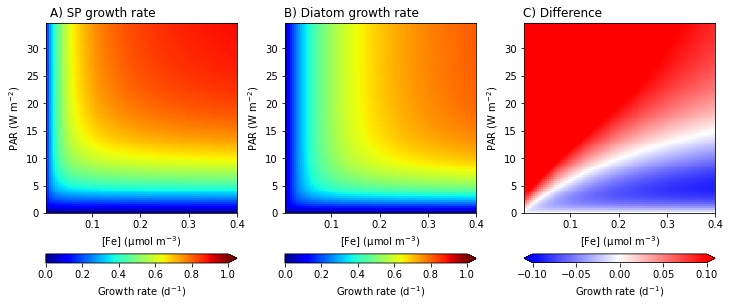

In [20]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,3,1)
ax.set_title('A) SP growth rate', x=0.3)
pc=ax.pcolormesh(Fe_vals*1000, PAR_vals, sp_growthrate_ACC2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
# labels = ['0.1','0.20','0.30','0.40']
# ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,2)
ax.set_title('B) Diatom growth rate', x=0.35)
pc=ax.pcolormesh(Fe_vals*1000, PAR_vals, diat_growthrate_ACC2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
# labels = ['0.1','0.20','0.30','0.40']
# ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,3)
ax.set_title('C) Difference', x=0.2)
pc=ax.pcolormesh(Fe_vals*1000, PAR_vals, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,cmap='bwr',vmin=-0.1,vmax=0.1)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
# labels = ['0.1','0.20','0.30','0.40']
# ax.set_xticklabels(labels)
#cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal')

cbar = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal', ticks=[-0.1,-0.05,0,0.05,0.1])
#cbar.ax.set_yticklabels(['-0.1','-0.05','0','0.05','0.1']) 

plt.subplots_adjust(wspace=0.25)

#fig.savefig('/glade/work/kristenk/figs/example_resource_comp.png', bbox_inches='tight', dpi=300, format='png');

In [21]:
SIZ_plotvals_2090s = xr.concat([ds_siz_2090s, ds_siz_2090s.isel(season=0)],dim='season')
SIZ_plotvals_1920s = xr.concat([ds_siz_1920s, ds_siz_1920s.isel(season=0)],dim='season')
ACC_plotvals_2090s = xr.concat([ds_acc_2090s, ds_acc_2090s.isel(season=0)],dim='season')
ACC_plotvals_1920s = xr.concat([ds_acc_1920s, ds_acc_1920s.isel(season=0)],dim='season')

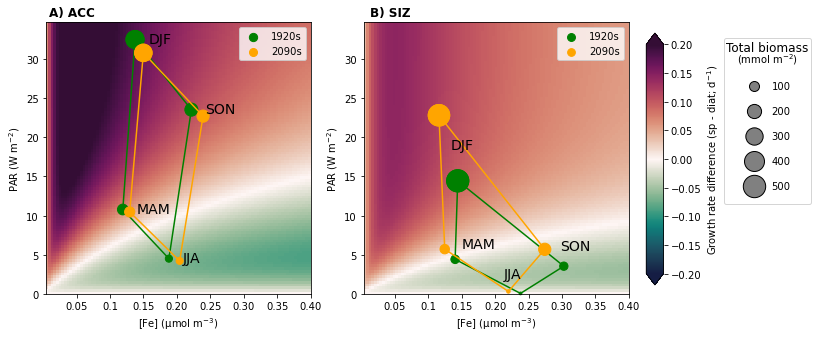

In [22]:
fig = plt.figure(figsize=(12,5))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('A) ACC',x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')

#1920s
s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.Fe_avg_50m.values,ACC_plotvals_1920s.PAR_avg_50m.values,
        marker='o',s=s,color='green',label='1920s', zorder=1)
ax.plot(ACC_plotvals_1920s.Fe_avg_50m.values,ACC_plotvals_1920s.PAR_avg_50m.values,
        color='green',zorder=1)

# #2090s
s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.Fe_avg_50m.values,ACC_plotvals_2090s.PAR_avg_50m.values,
        marker='o',s=s,color='orange',label='2090s',zorder=2)
ax.plot(ACC_plotvals_2090s.Fe_avg_50m.values,ACC_plotvals_2090s.PAR_avg_50m.values,
        color='orange',zorder=2)

## add season labels
for i, label in enumerate(annotations):
    plt.annotate(label, (ds_acc_1920s.Fe_avg_50m.values[i]+0.00002, ds_acc_1920s.PAR_avg_50m.values[i]-0.4),fontsize=14)

ax.legend(markerscale=0.6,scatterpoints=1, fontsize=10)
### add x axis labels in nmol/m3
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

######################################################### SIZ

ax = fig.add_subplot(1,2,2)

ax.set_title('B) SIZ', x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')

#1920s
s = [SIZ_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.Fe_avg_50m.values,SIZ_plotvals_1920s.PAR_avg_50m.values,
        marker='o',s=s,color='green',label='1920s',clip_on=False,zorder=1)
ax.plot(SIZ_plotvals_1920s.Fe_avg_50m.values,SIZ_plotvals_1920s.PAR_avg_50m.values,
        color='green',zorder=1)

# #1990s
s = [SIZ_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.Fe_avg_50m.values,SIZ_plotvals_2090s.PAR_avg_50m.values,
        marker='o',s=s,color='orange',label='2090s',clip_on=False,zorder=2)
ax.plot(SIZ_plotvals_2090s.Fe_avg_50m.values,SIZ_plotvals_2090s.PAR_avg_50m.values,
       color='orange',zorder=2)

## add season labels
# for i, label in enumerate(annotations):
#     plt.annotate(label, (SIZ_values_ds_1990s.Fe_avg_50m.values[i]+0.00001, SIZ_values_ds_1990s.PAR_avg_50m.values[i]+0.4), fontsize=14)

plt.annotate(annotations[0], (ds_siz_1920s.Fe_avg_50m.values[0]-0.00001, ds_siz_1920s.PAR_avg_50m.values[0]+4), fontsize=14)
plt.annotate(annotations[1], (ds_siz_1920s.Fe_avg_50m.values[1]+0.00001, ds_siz_1920s.PAR_avg_50m.values[1]+1.5), fontsize=14)
plt.annotate(annotations[2], (ds_siz_1920s.Fe_avg_50m.values[2]-0.000025, ds_siz_1920s.PAR_avg_50m.values[2]+2), fontsize=14)
plt.annotate(annotations[3], (ds_siz_1920s.Fe_avg_50m.values[3]-0.000005, ds_siz_1920s.PAR_avg_50m.values[3]+2), fontsize=14)

ax.legend(markerscale=0.5,scatterpoints=1, fontsize=10)

labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

#plt.annotate('Total biomass', (0.0005, 3), fontsize=14)
plt.figtext(0.912, 0.8, 'Total biomass', fontsize=12)

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

for x in [100, 200, 300, 400, 500]:
    plt.scatter([], [], c='gray', alpha=1, s=x, label=str(x), marker='o',edgecolors='black')
# legend2 = ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1, fancybox=True, shadow=False, title='Biomass')

legend2 = plt.legend(loc="upper right", title="(mmol m$^{-2}$)", bbox_to_anchor=(9.8, 1),
                     fancybox=True, labelspacing=1.5, borderpad=1.3)

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

# Fe and Temperature

### SIZ 2090s PAR

In [23]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals = np.arange(0.000004,0.00040,0.000004)
Temp_vals = np.arange(-2,16,0.18)
PAR = SIZ_2090s_Cweight_ds.PAR_avg_50m

## initialize empty matrices
sp_growthrate_SIZ2090s = np.full((100,100),np.nan)
diat_growthrate_SIZ2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals: # i loop
    
    for T in Temp_vals: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_SIZ2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_SIZ2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_SIZ2090s = xr.DataArray(sp_growthrate_SIZ2090s,dims=('temp_vals','fe_vals'))
diat_growthrate_SIZ2090s = xr.DataArray(diat_growthrate_SIZ2090s,dims=('temp_vals','fe_vals'))

### ACC 2090s PAR

In [24]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals = np.arange(0.000004,0.00040,0.000004)
Temp_vals = np.arange(-2,16,0.18)
PAR = ACC_2090s_Cweight_ds.PAR_avg_50m

## initialize empty matrices
sp_growthrate_ACC2090s = np.full((100,100),np.nan)
diat_growthrate_ACC2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals: # i loop
    
    for T in Temp_vals: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_ACC2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_ACC2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_ACC2090s = xr.DataArray(sp_growthrate_ACC2090s,dims=('par_vals','fe_vals'))
diat_growthrate_ACC2090s = xr.DataArray(diat_growthrate_ACC2090s,dims=('par_vals','fe_vals'))

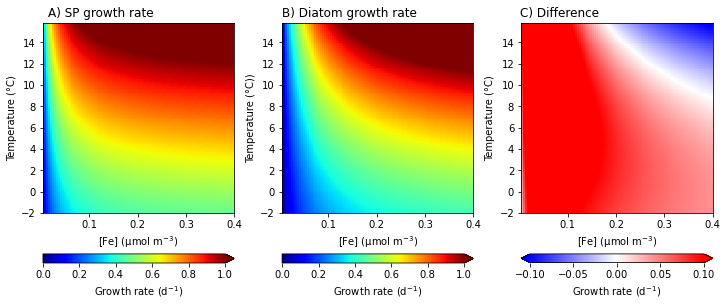

In [25]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,3,1)
ax.set_title('A) SP growth rate', x=0.3)
pc=ax.pcolormesh(Fe_vals*1000, Temp_vals, sp_growthrate_SIZ2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,2)
ax.set_title('B) Diatom growth rate', x=0.35)
pc=ax.pcolormesh(Fe_vals*1000, Temp_vals, diat_growthrate_SIZ2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('Temperature (°C))')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,3)
ax.set_title('C) Difference', x=0.2)
pc=ax.pcolormesh(Fe_vals*1000, Temp_vals, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,cmap='bwr',vmin=-0.1,vmax=0.1)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
#cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal')

cbar = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal', ticks=[-0.1,-0.05,0,0.05,0.1])
#cbar.ax.set_yticklabels(['-0.1','-0.05','0','0.05','0.1']) 

plt.subplots_adjust(wspace=0.25)

#fig.savefig('/glade/work/kristenk/figs/example_resource_comp.png', bbox_inches='tight', dpi=300, format='png');

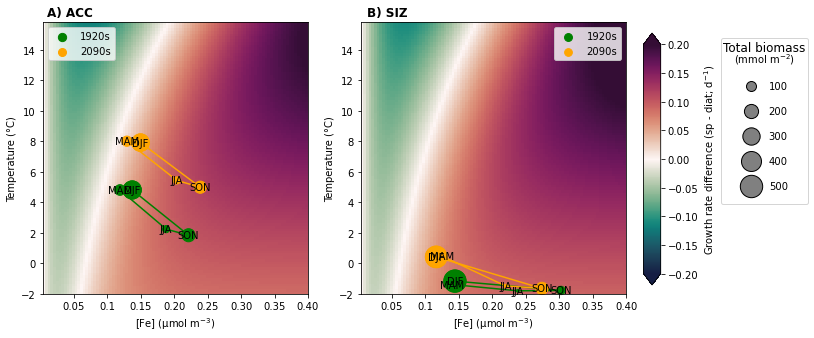

In [34]:
fig = plt.figure(figsize=(12,5))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('A) ACC',x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(Fe_vals, Temp_vals, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')

#1920s
s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.Fe_avg_50m.values,ACC_plotvals_1920s.TEMP_50m_mean.values,
        marker='o',s=s,color='green',label='1920s', zorder=1)
ax.plot(ACC_plotvals_1920s.Fe_avg_50m.values,ACC_plotvals_1920s.TEMP_50m_mean.values,
        color='green',zorder=1)

# #2090s
s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.Fe_avg_50m.values,ACC_plotvals_2090s.TEMP_50m_mean.values,
        marker='o',s=s,color='orange',label='2090s',zorder=2)
ax.plot(ACC_plotvals_2090s.Fe_avg_50m.values,ACC_plotvals_2090s.TEMP_50m_mean.values,
        color='orange',zorder=2)

## add season labels
plt.annotate(annotations[0], (ds_acc_1920s.Fe_avg_50m.values[0], ds_acc_1920s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_acc_1920s.Fe_avg_50m.values[1], ds_acc_1920s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_acc_1920s.Fe_avg_50m.values[2], ds_acc_1920s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_acc_1920s.Fe_avg_50m.values[3], ds_acc_1920s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

plt.annotate(annotations[0], (ds_acc_2090s.Fe_avg_50m.values[0], ds_acc_2090s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_acc_2090s.Fe_avg_50m.values[1], ds_acc_2090s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_acc_2090s.Fe_avg_50m.values[2], ds_acc_2090s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_acc_2090s.Fe_avg_50m.values[3], ds_acc_2090s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')


ax.legend(loc="upper left",markerscale=0.6,scatterpoints=1, fontsize=10)
### add x axis labels in µmol/m3
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

######################################################### SIZ

ax = fig.add_subplot(1,2,2)

ax.set_title('B) SIZ', x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(Fe_vals, Temp_vals, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('[Fe] (µmol m$^{-3}$)')

#1920s
s = [SIZ_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.Fe_avg_50m.values,SIZ_plotvals_1920s.TEMP_50m_mean.values,
        marker='o',s=s,color='green',label='1920s',clip_on=False,zorder=1)
ax.plot(SIZ_plotvals_1920s.Fe_avg_50m.values,SIZ_plotvals_1920s.TEMP_50m_mean.values,
        color='green',zorder=1)

# #1990s
s = [SIZ_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.Fe_avg_50m.values,SIZ_plotvals_2090s.TEMP_50m_mean.values,
        marker='o',s=s,color='orange',label='2090s',clip_on=False,zorder=2)
ax.plot(SIZ_plotvals_2090s.Fe_avg_50m.values,SIZ_plotvals_2090s.TEMP_50m_mean.values,
       color='orange',zorder=2)

plt.annotate(annotations[0], (ds_siz_1920s.Fe_avg_50m.values[0], ds_siz_1920s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_siz_1920s.Fe_avg_50m.values[1], ds_siz_1920s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_siz_1920s.Fe_avg_50m.values[2], ds_siz_1920s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_siz_1920s.Fe_avg_50m.values[3], ds_siz_1920s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

plt.annotate(annotations[0], (ds_siz_2090s.Fe_avg_50m.values[0], ds_siz_2090s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_siz_2090s.Fe_avg_50m.values[1], ds_siz_2090s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_siz_2090s.Fe_avg_50m.values[2], ds_siz_2090s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_siz_2090s.Fe_avg_50m.values[3], ds_siz_2090s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

ax.legend(markerscale=0.5,scatterpoints=1, fontsize=10)

labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

#plt.annotate('Total biomass', (0.0005, 3), fontsize=14)
plt.figtext(0.912, 0.8, 'Total biomass', fontsize=12)

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

for x in [100, 200, 300, 400, 500]:
    plt.scatter([], [], c='gray', alpha=1, s=x, label=str(x), marker='o',edgecolors='black')
# legend2 = ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1, fancybox=True, shadow=False, title='Biomass')

legend2 = plt.legend(loc="upper right", title="(mmol m$^{-2}$)", bbox_to_anchor=(9.8, 1),
                     fancybox=True, labelspacing=1.5, borderpad=1.3)

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

# Temp and PAR

### SIZ 2090s Fe

In [27]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe = SIZ_2090s_Cweight_ds.Fe_avg_50m
Temp_vals = np.arange(-2,16,0.18)
PAR_vals = np.arange(0,35,0.35)

## initialize empty matrices
sp_growthrate_SIZ2090s = np.full((100,100),np.nan)
diat_growthrate_SIZ2090s = np.full((100,100),np.nan)

i=0
j=0

for PAR in PAR_vals: # i loop
    
    for T in Temp_vals: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_SIZ2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_SIZ2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_SIZ2090s = xr.DataArray(sp_growthrate_SIZ2090s,dims=('temp_vals','par_vals'))
diat_growthrate_SIZ2090s = xr.DataArray(diat_growthrate_SIZ2090s,dims=('temp_vals','par_vals'))

### ACC 2090s Fe

In [28]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe = ACC_2090s_Cweight_ds.Fe_avg_50m
Temp_vals = np.arange(-2,16,0.18)
PAR_vals = np.arange(0,35,0.35)

## initialize empty matrices
sp_growthrate_ACC2090s = np.full((100,100),np.nan)
diat_growthrate_ACC2090s = np.full((100,100),np.nan)

i=0
j=0

for PAR in PAR_vals: # i loop
    
    for T in Temp_vals: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_ACC2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_ACC2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_ACC2090s = xr.DataArray(sp_growthrate_ACC2090s,dims=('temp_vals','par_vals'))
diat_growthrate_ACC2090s = xr.DataArray(diat_growthrate_ACC2090s,dims=('temp_vals','par_vals'))

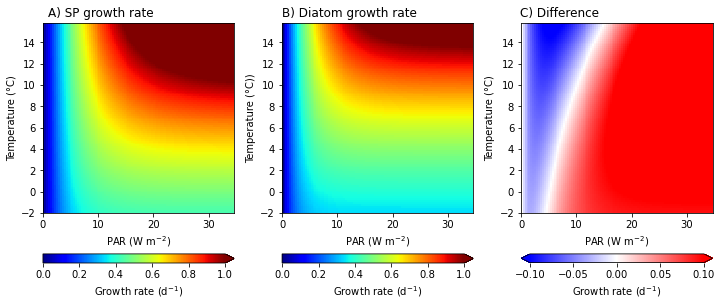

In [29]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,3,1)
ax.set_title('A) SP growth rate', x=0.3)
pc=ax.pcolormesh(PAR_vals, Temp_vals, sp_growthrate_SIZ2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,2)
ax.set_title('B) Diatom growth rate', x=0.35)
pc=ax.pcolormesh(PAR_vals, Temp_vals, diat_growthrate_SIZ2090s,cmap='jet',vmin=0,vmax=1)
ax.set_ylabel('Temperature (°C))')
ax.set_xlabel('PAR (W m$^{-2}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,3)
ax.set_title('C) Difference', x=0.2)
pc=ax.pcolormesh(PAR_vals, Temp_vals, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,cmap='bwr',vmin=-0.1,vmax=0.1)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
#cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal')

cbar = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal', ticks=[-0.1,-0.05,0,0.05,0.1])
#cbar.ax.set_yticklabels(['-0.1','-0.05','0','0.05','0.1']) 

plt.subplots_adjust(wspace=0.25)

#fig.savefig('/glade/work/kristenk/figs/example_resource_comp.png', bbox_inches='tight', dpi=300, format='png');

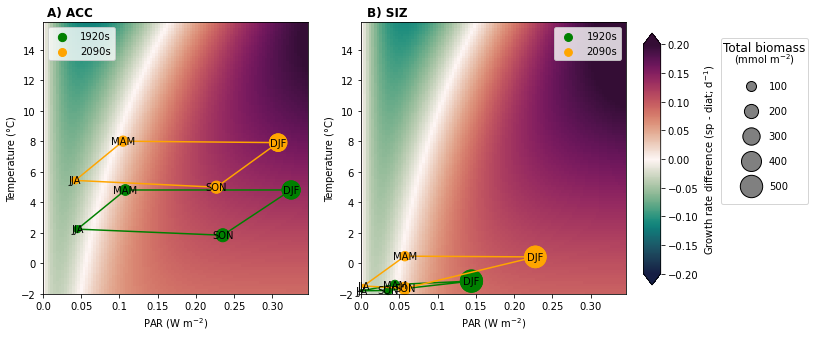

In [37]:
fig = plt.figure(figsize=(12,5))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('A) ACC',x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(PAR_vals, Temp_vals, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.PAR_avg_50m.values,ACC_plotvals_1920s.TEMP_50m_mean.values,
        marker='o',s=s,color='green',label='1920s', zorder=1)
ax.plot(ACC_plotvals_1920s.PAR_avg_50m.values,ACC_plotvals_1920s.TEMP_50m_mean.values,
        color='green',zorder=1)

# #2090s
s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.PAR_avg_50m.values,ACC_plotvals_2090s.TEMP_50m_mean.values,
        marker='o',s=s,color='orange',label='2090s',zorder=2)
ax.plot(ACC_plotvals_2090s.PAR_avg_50m.values,ACC_plotvals_2090s.TEMP_50m_mean.values,
        color='orange',zorder=2)

## add season labels
plt.annotate(annotations[0], (ds_acc_1920s.PAR_avg_50m.values[0], ds_acc_1920s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_acc_1920s.PAR_avg_50m.values[1], ds_acc_1920s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_acc_1920s.PAR_avg_50m.values[2], ds_acc_1920s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_acc_1920s.PAR_avg_50m.values[3], ds_acc_1920s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

plt.annotate(annotations[0], (ds_acc_2090s.PAR_avg_50m.values[0], ds_acc_2090s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_acc_2090s.PAR_avg_50m.values[1], ds_acc_2090s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_acc_2090s.PAR_avg_50m.values[2], ds_acc_2090s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_acc_2090s.PAR_avg_50m.values[3], ds_acc_2090s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')


ax.legend(loc="upper left",markerscale=0.6,scatterpoints=1, fontsize=10)
### add x axis labels in nmol/m3
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

######################################################### SIZ

ax = fig.add_subplot(1,2,2)

ax.set_title('B) SIZ', x=0.1,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(PAR_vals, Temp_vals, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,cmap=cmocean.cm.curl,vmin=-0.2,vmax=0.2)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
s = [SIZ_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.PAR_avg_50m.values,SIZ_plotvals_1920s.TEMP_50m_mean.values,
        marker='o',s=s,color='green',label='1920s',clip_on=False,zorder=1)
ax.plot(SIZ_plotvals_1920s.PAR_avg_50m.values,SIZ_plotvals_1920s.TEMP_50m_mean.values,
        color='green',zorder=1)

# #1990s
s = [SIZ_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.PAR_avg_50m.values,SIZ_plotvals_2090s.TEMP_50m_mean.values,
        marker='o',s=s,color='orange',label='2090s',clip_on=False,zorder=2)
ax.plot(SIZ_plotvals_2090s.PAR_avg_50m.values,SIZ_plotvals_2090s.TEMP_50m_mean.values,
       color='orange',zorder=2)

## add season labels
plt.annotate(annotations[0], (ds_siz_1920s.PAR_avg_50m.values[0], ds_siz_1920s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_siz_1920s.PAR_avg_50m.values[1], ds_siz_1920s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_siz_1920s.PAR_avg_50m.values[2], ds_siz_1920s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_siz_1920s.PAR_avg_50m.values[3], ds_siz_1920s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

plt.annotate(annotations[0], (ds_siz_2090s.PAR_avg_50m.values[0], ds_siz_2090s.TEMP_50m_mean.values[0]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[1], (ds_siz_2090s.PAR_avg_50m.values[1], ds_siz_2090s.TEMP_50m_mean.values[1]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[2], (ds_siz_2090s.PAR_avg_50m.values[2], ds_siz_2090s.TEMP_50m_mean.values[2]-0.2), fontsize=10,ha='center')
plt.annotate(annotations[3], (ds_siz_2090s.PAR_avg_50m.values[3], ds_siz_2090s.TEMP_50m_mean.values[3]-0.2), fontsize=10,ha='center')

ax.legend(markerscale=0.5,scatterpoints=1, fontsize=10)

labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)

#plt.annotate('Total biomass', (0.0005, 3), fontsize=14)
plt.figtext(0.912, 0.8, 'Total biomass', fontsize=12)

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

for x in [100, 200, 300, 400, 500]:
    plt.scatter([], [], c='gray', alpha=1, s=x, label=str(x), marker='o',edgecolors='black')
# legend2 = ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1, fancybox=True, shadow=False, title='Biomass')

legend2 = plt.legend(loc="upper right", title="(mmol m$^{-2}$)", bbox_to_anchor=(9.8, 1),
                     fancybox=True, labelspacing=1.5, borderpad=1.3)

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');